In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, chi2, RFECV, RFE, SelectFromModel
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Load training data and test data

# 5. Model Selection

In [32]:
X_data_3 = pd.read_csv('/content/drive/MyDrive/AML/task1/RandomForest_features_train.csv') # df stands for dataframe
y_data = pd.read_csv('/content/drive/MyDrive/AML/task1/RandomForest_target_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/AML/task1/RandomForest_features_test.csv')

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data_3, y_data, test_size=0.2, random_state=1)
print("X_train shape: ", X_train.shape)

X_train shape:  (959, 70)


## ANN

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras import regularizers
# fix random seed for reproducibility

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [36]:
dropout=0.1

model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))

model.add(Dense(1, kernel_initializer='he_uniform'))
# Compile model
opt = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=[coeff_determination])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                2130      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 30)                0         
                                                                 
 dropout_6 (Dropout)         (None, 30)                0         
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 30)                0         
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_9 (Dense)             (None, 30)               

In [38]:
# Fit the model
history = model.fit(X_data_3, y_data, epochs=80, verbose=2, validation_split=0.1,
                    shuffle=True, steps_per_epoch=60, initial_epoch=0, validation_steps=5)

Epoch 1/80
60/60 - 1s - loss: 2081.8506 - coeff_determination: -1.9477e+01 - val_loss: 539.5435 - val_coeff_determination: -1.6814e+00 - 1s/epoch - 23ms/step
Epoch 2/80
60/60 - 0s - loss: 651.2236 - coeff_determination: -3.5096e+00 - val_loss: 349.1661 - val_coeff_determination: -5.9178e-02 - 157ms/epoch - 3ms/step
Epoch 3/80
60/60 - 0s - loss: 561.9703 - coeff_determination: -2.8418e+00 - val_loss: 309.0683 - val_coeff_determination: 0.0578 - 164ms/epoch - 3ms/step
Epoch 4/80
60/60 - 0s - loss: 447.2726 - coeff_determination: -1.8536e+00 - val_loss: 279.3965 - val_coeff_determination: 0.1193 - 146ms/epoch - 2ms/step
Epoch 5/80
60/60 - 0s - loss: 382.4242 - coeff_determination: -1.3105e+00 - val_loss: 255.7680 - val_coeff_determination: 0.1774 - 153ms/epoch - 3ms/step
Epoch 6/80
60/60 - 0s - loss: 353.1938 - coeff_determination: -1.2364e+00 - val_loss: 255.2616 - val_coeff_determination: -1.2004e-02 - 150ms/epoch - 2ms/step
Epoch 7/80
60/60 - 0s - loss: 347.8018 - coeff_determination: 

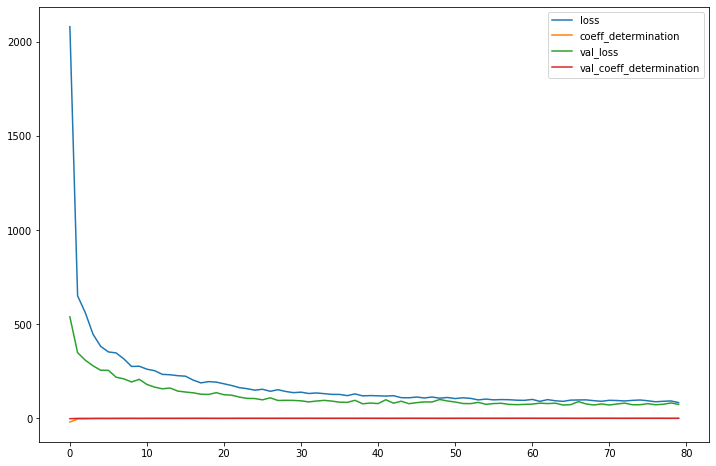

In [39]:
pd.DataFrame(history.history).plot(figsize=(12, 8))

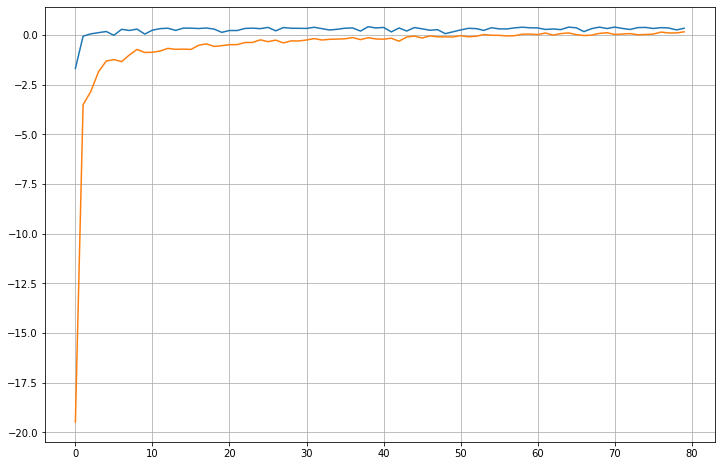

In [40]:
data = pd.DataFrame(history.history)
data["val_coeff_determination"].plot(figsize=(12, 8))
data["coeff_determination"].plot(figsize=(12, 8))
plt.grid(True)

In [45]:
y_pred = model.predict(X_valid)
r_score = r2_score(y_valid, y_pred)
print("Validation score:", r_score)

Validation score: 0.44782790078760004


# 6. Export the prediction

In [46]:
# rfr = grid.best_estimator_

y_test = model.predict(X_test)
data_id = X_df['id']
result = list(zip(data_id,y_test))
result_table = pd.DataFrame(data = result, columns = ['id', 'y'])
result_table.tail()
result_table.to_csv('ann.csv', index = False)